# Astropy

We will see some simple examples that make use of the [Astropy](https://www.astropy.org/) python library.


## Read an ASCII file
First of all we need to load the library.

In [1]:
from astropy.io import ascii

We now create a data file with some data

In [2]:
import numpy as np
x = np.random.uniform(0.0,3.0,100)
y = np.random.uniform(10.0,100.0,100)
xx=np.c_[np.linspace(1,100,100), x, y]
np.savetxt('./fake_data.txt',xx,
           header='giorno \t | temp \t | press',
           comments='# fake data\n# generated by me\n',
           delimiter='\t|',
           fmt='%1.3f')

We now read the data

In [3]:
tbl = ascii.read("./fake_data.txt")

In [4]:
tbl.colnames

['giorno', 'temp', 'press']

In [5]:
tbl

giorno,temp,press
float64,float64,float64
1.0,0.773,92.586
2.0,1.606,21.746
3.0,1.77,69.478
4.0,2.533,12.743
5.0,2.833,76.636
6.0,2.876,51.587
7.0,0.143,73.308
8.0,0.406,65.089
9.0,2.241,18.824


In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

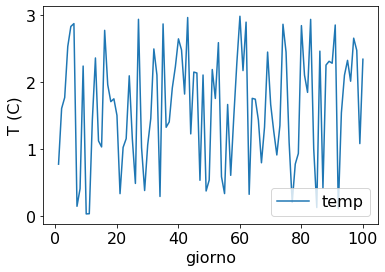

In [7]:
plt.plot(tbl['giorno'], tbl['temp'], label='temp')
plt.legend(loc='lower right')
plt.xlabel('giorno')
plt.ylabel('T (C)')
plt.show() #this is actually only needed outside a jupyter notebook

## Read FITS data

In this example we will see how to use Astropy to read FITS (Flexible Image Transport System) data. For an introduction on the FITS format you may have a look at the [NASA High Energy Astrophysics page](https://heasarc.gsfc.nasa.gov/docs/heasarc/fits.html).

In [8]:
#import the fits module from astropy
from astropy.io import fits

We now download the example FITS files (which contain the image data for the Horsehead Nebula) using the ones available in the [Astropy FITS Tutorial](https://learn.astropy.org/tutorials/FITS-images.html).

In [9]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

We now open the FITS file in order to plot the image contained in it.

In [10]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: C:\Users\bgiacoma\.astropy\cache\download\py3\2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [11]:
#PRIMARY contains the image in numpy array format
image_data = hdu_list[0].data

In [12]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [13]:
# we can close the file to save memory if we do not need to load anything more from it
hdu_list.close()

In [14]:
#We can have a look at the values of the single pixels
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


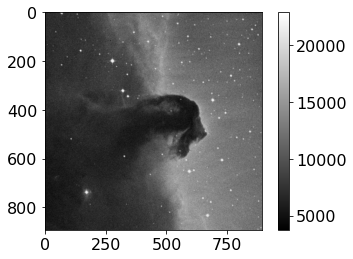

In [15]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

## Exercise 1
Download [this data file](https://raw.githubusercontent.com/bgiacoma/introduction-to-python/main/200407_200701_USRP.txt).

This file contains data measured with the radio telescope in Bicocca unsing the 1.4 GHz digital receiver.

The file name represents the time the file was opened, in local time: yearmonthday_hourminuteseconds_USRP.txt (e.g. 200404_101743_USRP.txt).
The files are closed after approximately 5 minutes of data collection, corresponding to 150 records.
The sampling time, or the interval between two records, is two seconds.
Each record is made up of several fields.
The fields are separated by ";" and the format is as follows:
- time (in milliseconds) – time elapsed since the file was opened
- Frequency (in Hz) – frequency of the lowest frequency channel
- Frequency step (in Hz) – frequency step between two channels, i.e. channel bandwidth
- Measurement (in dBm) – signal recorded by the receiver, channel by channel, repeated for 8192 channels.

For example:
2181,000; 1300000000,000; 19531,250; -91.520; -92.976; ...

Note that a comma is used to separate decimals.

Hint: to download the file directly from within the notebook, you can execute the following terminal command in a cell:

`` 
wget https://raw.githubusercontent.com/bgiacoma/introduction-to-python/main/200407_200701_USRP.txt
``